In [1]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

動画の9分くらいで書かれているデータを模倣する。

In [2]:
def gaussian(x, mu=0, sigma=1):
    return 1 / (np.sqrt(2 * np.pi) * sigma) * np.e ** (- (x - mu) ** 2 / (2 * sigma ** 2))

data = np.array([
    *[[x, gaussian(x, mu=7, sigma=4.5)] for x in range(1, 11)],
    *[[x, 0.127 - gaussian(x, mu=14, sigma=5.5)] for x in range(11, 19)]
])

X = data[:, 0][:, np.newaxis]
y = data[:, 1]

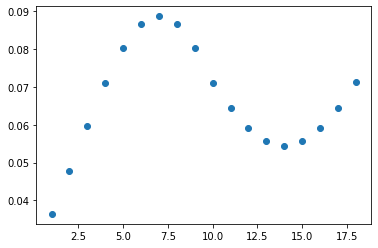

In [3]:
plt.scatter(X, y)
plt.show()

どっちでも使う関数を定義する。

In [4]:
def _add_intercept(X):
    """入力データの最初の次元にinterceptを追加する"""
    intercept = np.ones((X.shape[0], 1))
    X = np.concatenate((intercept, X), axis=1)
    
    return X

まずLogistic Regressionを実装する。

In [5]:
class LogisticRegression:
    def __init__(self, num_features):
        self.theta = np.zeros(num_features + 1)
    
    def fit(self, X, y, lr=0.001, num_epochs=10):
        history = defaultdict(list)
        for epoch in range(1, num_epochs + 1):
            loss = self.loss_fn(X, y)
            history['loss'].append(loss)

            hypothesis = self.predict(X)
            diff = self.predict(X) - y
            grad = np.sum(diff[:, np.newaxis] * X, axis=0)
            self.theta -= lr * grad
        
        return history   
    
    def predict(self, X):
        X = _add_intercept(X)
        
        return np.sum(self.theta * X, axis=1)
    
    def loss_fn(self, X, y):
        diff = self.predict(X) - y
        loss = np.sum(diff ** 2) / 2
        
        return loss

In [6]:
clf = LogisticRegression(num_features=1)
history = clf.fit(X, y, lr=0.0001, num_epochs=20)

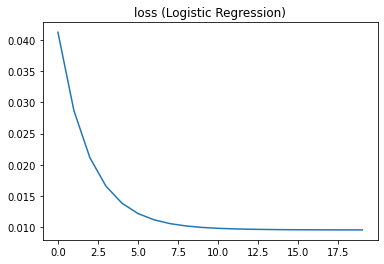

In [7]:
plt.plot(history['loss'])
plt.title('loss (Logistic Regression)')
plt.show()

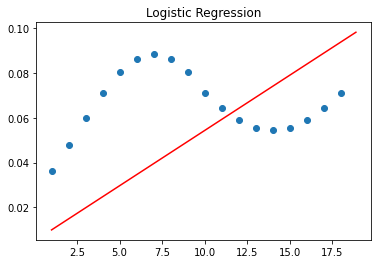

In [8]:
X_plot = np.arange(X.min(), X.max() + 1, 0.1)[:, np.newaxis]
y_plot = clf.predict(X_plot)
plt.plot(X_plot, y_plot, c='red')
plt.scatter(X, y)
plt.title('Logistic Regression')
plt.show()

次にLocally Weighted Regressionを実装する。

In [9]:
class LocallyWeightedRegression:
    def __init__(self, num_features, X, y, lr=0.001, num_epochs=10, tao=1):
        self.num_features = num_features
        self.X = _add_intercept(X)
        self.y = y
        self.lr = lr
        self.num_epochs = num_epochs
        self.tao = tao
        
    def predict(self, X):
        X = _add_intercept(X)
        preds = []
        
        for x in X:
            x = x[np.newaxis, :]
            self.theta = np.zeros(self.num_features + 1)
            
            for _ in range(self.num_epochs):
                weight = np.exp(- np.sum((self.X - x) ** 2, axis=1) / (2 * self.tao ** 2))  # weight.shape=(m,)
                diff = self._predict(self.X) - self.y  # diff.shape=(m,)
                grad = np.sum((weight * diff)[:, np.newaxis] * self.X, axis=0)  # grad.shape=(m,)
                self.theta -= self.lr * grad
            
            pred = self._predict(x)
            preds.append(pred)
            
        return preds
            
    def _predict(self, X):
        return  np.sum(self.theta * X, axis=1)

In [10]:
clf = LocallyWeightedRegression(num_features=1, X=X, y=y, lr=0.002, num_epochs=50, tao=1)

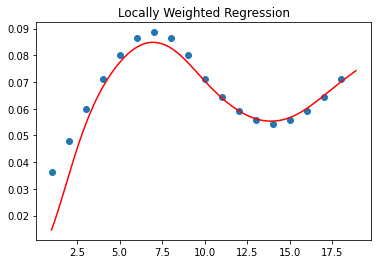

In [11]:
X_plot = np.arange(X.min(), X.max() + 1, 0.1)[:, np.newaxis]
y_plot = clf.predict(X_plot)
plt.plot(X_plot, y_plot, c='red')
plt.scatter(X, y)
plt.title('Locally Weighted Regression')
plt.show()